#Disbalanced dataset 1

- используемый датасет: creditcart (https://drive.google.com/file/d/13_lSUSV6IQBIP8CDG7xUp8JXmtNQxW-M/view?usp=sharing)

- транзакции, проведенные за два дня, где 492 случаев мошенничества из 284 807 транзакций. Набор данных сильно несбалансирован, положительный класс (мошенники) составляет всего 0,172% от всех транзакций.

- только числовые входные переменные, которые являются результатом преобразования PCA (метод главных компонент).

- характеристики V1, V2, ... V28 -  главные компоненты, полученные с помощью PCA, единственные характеристики, которые не были преобразованы с помощью PCA - это "Time" и "Amount". Столбец "Time" содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. Столбец "Amount" - это сумма транзакции. Столбец "Class" является переменной отклика и принимает значение 1 в случае мошенничества и 0 в противном случае.


##Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Сист. и тех. анализа данных/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##Анализ данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

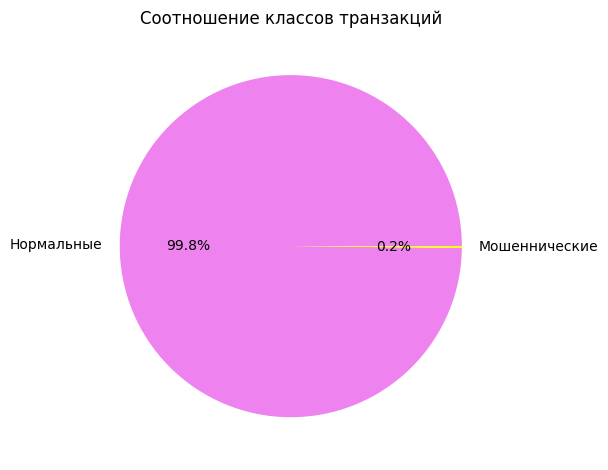

In [ ]:
vals = df['Class'].unique() #уникальные значения
class_counts = df['Class'].value_counts()   #их количество

list_values = {'Нормальные': class_counts[0], 'Мошеннические': class_counts[1]}

plt.title('Соотношение классов транзакций')
plt.pie(list_values.values(), labels=list_values.keys(), autopct='%1.1f%%', colors=['violet', 'yellow'])
plt.tight_layout()

Если упростить данные модель может пропустить данные с мошенническими операциями, следовательно надо понизить размерность.

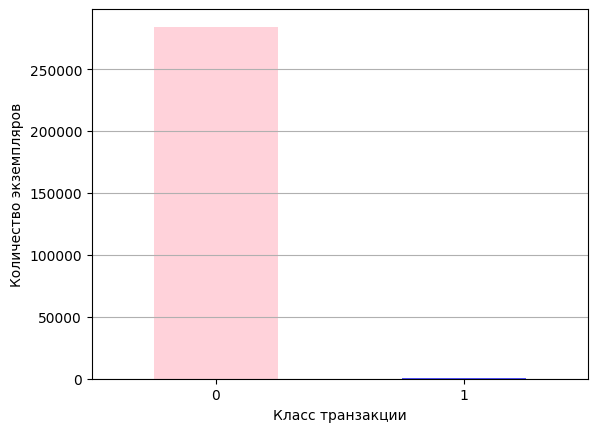

In [ ]:
class_counts.plot(kind='bar', color=['pink', 'blue'], alpha=0.7)
plt.xlabel('Класс транзакции')
plt.ylabel('Количество экземпляров')
plt.xticks(ticks=range(len(class_counts)), labels=class_counts.index, rotation=0)
plt.grid(axis='y')

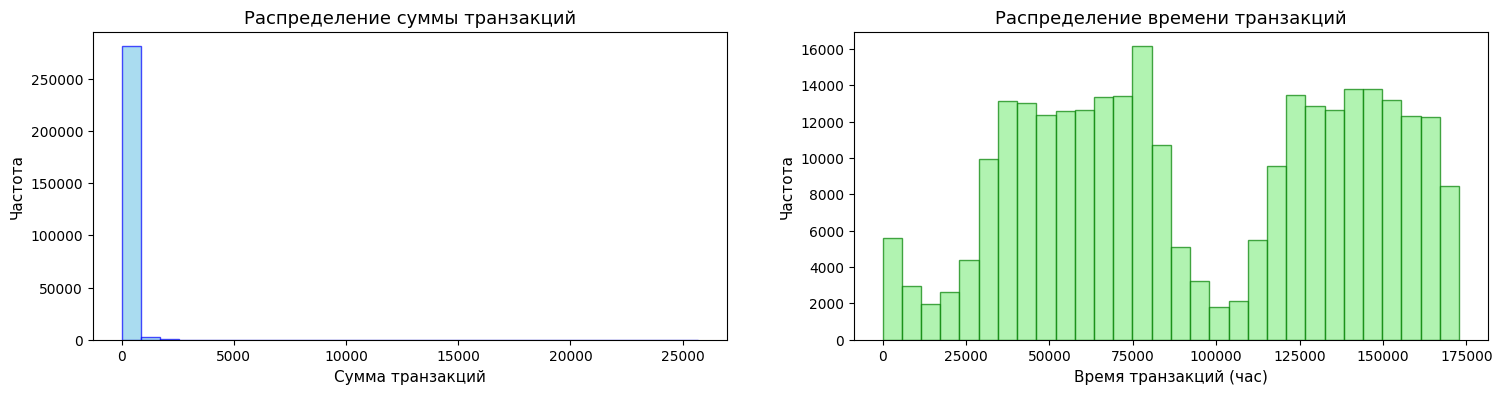

In [ ]:
#распределения по сумме и времени транзакций

fig, ax = plt.subplots(1, 2, figsize=(18, 4))
amount_val = df['Amount']
time_val = df['Time']


ax[0].hist(amount_val, bins=30, color='skyblue', edgecolor='blue', alpha=0.7)
ax[0].set_title('Распределение суммы транзакций', fontsize=13)
ax[0].set_xlabel('Сумма транзакций', fontsize=11)
ax[0].set_ylabel('Частота', fontsize=11)

ax[1].hist(time_val, bins=30, color='lightgreen', edgecolor='green', alpha=0.7)
ax[1].set_title('Распределение времени транзакций', fontsize=13)
ax[1].set_xlabel('Время транзакций (час)', fontsize=11)
ax[1].set_ylabel('Частота', fontsize=11)
plt.show()

##Масштабирование данных

###Метод Random Under-Sampling

Перед балансировкой необходимо разделить исходный набор данных.

Для определения качества работы моделей их необходимо тестировать на исходном тестовом наборе, а не на тестовом наборе, созданном после балансировки.

Цель балансировки заключается в том, чтобы модель смогла найти закономерности для принятия решения по типу транзакции, поэтому мы выравниваем соотношение между мошенническими транзакциями и обычными. Однако проверять качество надо в реальных условиях (исходные данные).

In [ ]:
from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы, которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state = 42)

# Посмотрим, какие типы данных возвращаются после разделения:
rt_tmp = original_Xtrain['Amount']
print (f'Тип данных original_Xtrain["Amount"] {type(rt_tmp)}')
print (f'Тип данных original_Xtrain["Amount"].values {type(rt_tmp.values)}')
print (f'Данные original_Xtrain["Amount"].values {rt_tmp.values}')
print (f'Тип данных original_Xtrain["Amount"].values.reshape(-1,1) {type(rt_tmp.values.reshape(-1,1))}')
print (f'Данные original_Xtrain["Amount"].values.reshape(-1,1) \n{rt_tmp.values.reshape(-1,1)} \n')

Тип данных original_Xtrain["Amount"] <class 'pandas.core.series.Series'>
Тип данных original_Xtrain["Amount"].values <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values [  9.99  45.9   11.99 ...   3.94   1.   113.  ]
Тип данных original_Xtrain["Amount"].values.reshape(-1,1) <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values.reshape(-1,1) 
[[  9.99]
 [ 45.9 ]
 [ 11.99]
 ...
 [  3.94]
 [  1.  ]
 [113.  ]] 



Последнее представление - то, что нужно для RobustScaler . Преобразовываем так все остальные столбцы.

In [ ]:
original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.fit_transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.fit_transform(original_Xtest['Time'].values.reshape(-1,1))

original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

#преобразование в массивы np
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

#количество классов и количество экземпляров в каждом классе для тренировочного и тестового наборов
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Распределение классов: 

Обучающий набор: [0.99827075 0.00172925]
Тестовый набор: [0.99827955 0.00172045]


In [ ]:
# Поскольку наши классы сильно не сбалансированы, мы должны сделать их эквивалентными,
# чтобы получить нормальное распределение классов.

# Перемешаем данные перед созданием подвыборок (для улучшения качества обучение)

df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492] # берем последние 492 транзакции

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Перемешивание строк датасета
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
283911,171984.0,-11.320268,9.645684,-9.373020,-2.051196,-5.020719,-2.525265,-4.533222,6.863270,1.891773,...,0.198191,0.145579,0.946867,-0.503929,1.361355,0.243434,0.968211,0.823908,3.70,0
6529,7891.0,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,-1.207166,...,0.501543,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1.00,1
246809,153336.0,2.063767,-0.488559,-1.799317,0.518851,0.130354,-0.503761,0.113631,-0.224508,-0.970983,...,-0.279769,-0.254201,-0.013790,-0.608267,0.344953,-0.476448,-0.004394,-0.067904,43.40,0
9035,12597.0,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,-5.654212,...,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1.00,1
99506,67150.0,-1.824295,0.403327,-1.994122,2.756558,-3.139064,0.408185,-1.209045,1.095634,-1.447225,...,0.838760,0.341727,0.947506,-0.145493,0.049326,0.831065,0.332421,0.252713,489.71,1


In [ ]:
new_df.shape

(984, 31)

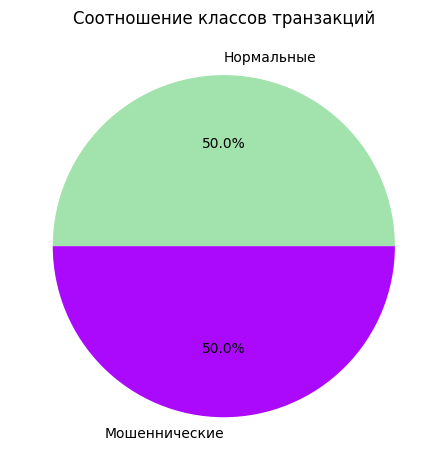

In [ ]:
vals = new_df['Class'].unique() #уникальные значения
class_counts = new_df['Class'].value_counts()   #их количество

list_values = {'Нормальные': class_counts[0], 'Мошеннические': class_counts[1]}

plt.title('Соотношение классов транзакций')
plt.pie(list_values.values(), labels=list_values.keys(), autopct='%1.1f%%', colors=['#A2E2AC', '#AA09FC'])
plt.tight_layout()

Класс сбалансирован, можно проводить исследование.

###Визуализация. Матрица корреляции

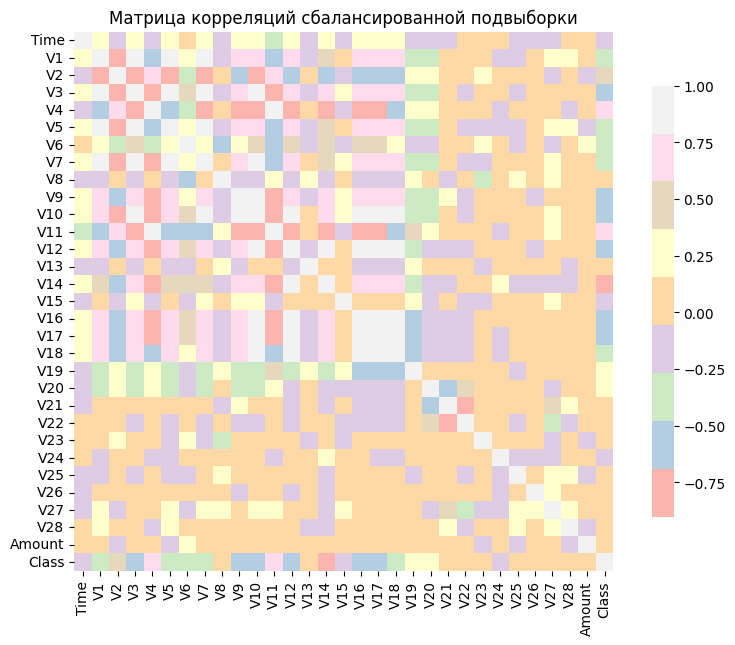

In [ ]:
correlation_matrix = new_df.corr()

plt.figure(figsize=(10, 7))

sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='Pastel1', square=True, cbar_kws={"shrink": .8})
plt.title('Матрица корреляций сбалансированной подвыборки', fontsize=12)
plt.show()


Сильная зависимость v16-v18 c v16-v18

<ul>
<li><b>Отрицательные корреляции: </b> Какие признаки  имеют отрицательную корреляцию? Другими словами, чем ниже эти значения, тем больше вероятность того, что конечным результатом будет мошенническая операция.  </li>
<li> <b> Положительные корреляции: </b> Какие признаки  положительно коррелируют? То есть, чем выше эти значения, тем больше вероятность того, что конечным результатом будет мошенническая операция. </li>
</ul>

In [ ]:
corr = correlation_matrix['Class'].drop('Class')

# Отрицательные корреляции
negative_corr = corr[corr < 0].index.tolist()

# Положительные корреляции
positive_corr = corr[corr > 0].index.tolist()

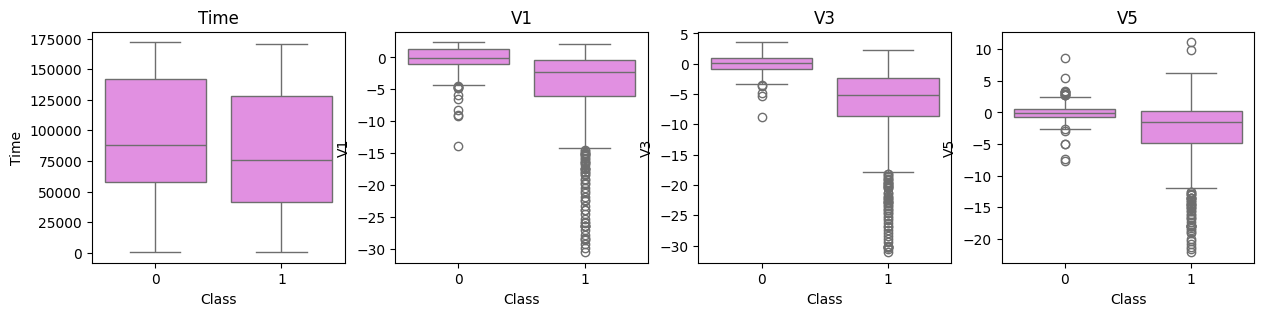

In [ ]:
#для отрицательных корреляций
f, axes = plt.subplots(ncols=4, figsize=(15, 3))
for ax, feature in zip(axes, negative_corr):
    sns.boxplot(x='Class', y=feature, data=new_df, ax=ax, color = 'violet')
    ax.set_title(feature)
    ax.set_xlabel('Class')
    ax.set_ylabel(feature)

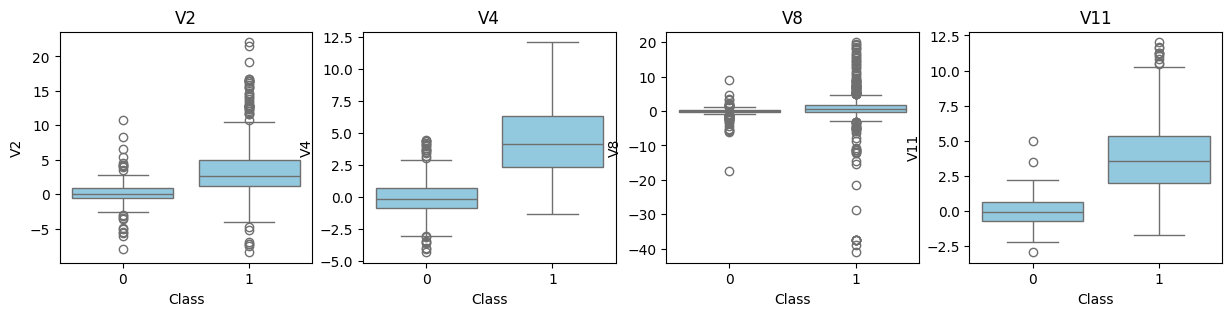

In [ ]:
#для отрицательных корреляций
f, axes = plt.subplots(ncols=4, figsize=(15, 3))
for ax, feature in zip(axes, positive_corr):
    sns.boxplot(x='Class', y=feature, data=new_df, ax=ax, color = 'skyblue')
    ax.set_title(feature)
    ax.set_xlabel('Class')
    ax.set_ylabel(feature)

###Обработка выбросов

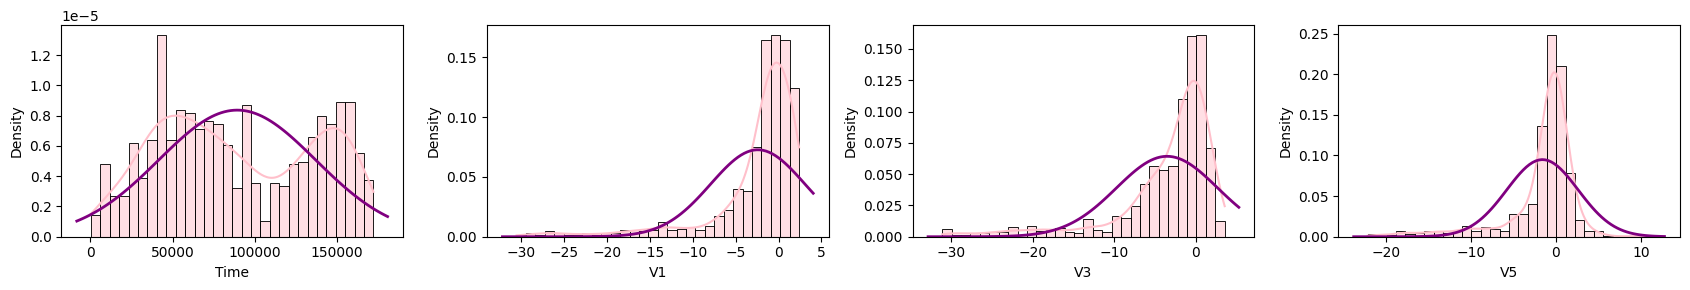

In [ ]:
from scipy.stats import norm

# Создание подграфиков для признаков с отрицательной корреляцией
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(17, 3))

#распределения для признаков с отрицательной корреляцией
for ax, feature in zip((ax1, ax2, ax3, ax4), negative_corr[:4]):
    sns.histplot(new_df[feature], bins=30, kde=True, ax=ax, stat="density", color='pink')

    mu, std = norm.fit(new_df[feature])
    xmin, xmax = ax.get_xlim()  #границы X
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'purple', linewidth=2)  #нормальное распределение
    ax.set_xlabel(feature, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
def remove(df, features):
    for feature in features:
      v_fraud = df[feature].loc[df['Class'] == 1].values
      #вычисление квартилей
      q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
      v_iqr = q75 - q25
      print('Квартиль 25: {} | Квартиль 75: {}'.format(q25, q75))
      print('iqr: {}'.format(v_iqr))

      #определение порогов для выбросов
      v_cut_off = v_iqr * 1.5
      v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
      print('Порог: {}'.format(v_cut_off))
      print('V17 нижняя граница: {}'.format(v_lower))
      print('V17 верхняя граница: {}'.format(v_upper))

      # Удаление выбросов
      outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
      print('Количество выбросов: {}'.format(len(outliers)))
      df  = df.drop(df[(df[feature] > v_upper) | (df[feature] < v_lower)].index)
      print('-' * 50)
    return df


In [ ]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                     'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
                     'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
                     'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Time']

new_df_without_outliers = remove(new_df, features)

Квартиль 25: -6.03606299434868 | Квартиль 75: -0.419200076257679
iqr: 5.616862918091001
Порог: 8.4252943771365
V17 нижняя граница: -14.461357371485182
V17 верхняя граница: 8.006094300878821
Количество выбросов: 52
--------------------------------------------------
Квартиль 25: 1.1086191157528824 | Квартиль 75: 3.9163736295138802
iqr: 2.807754513760998
Порог: 4.211631770641497
V17 нижняя граница: -3.1030126548886146
V17 верхняя граница: 8.128005400155377
Количество выбросов: 26
--------------------------------------------------
Квартиль 25: -6.559491963273132 | Квартиль 75: -1.985937229072785
iqr: 4.573554734200346
Порог: 6.86033210130052
V17 нижняя граница: -13.419824064573652
V17 верхняя граница: 4.874394872227734
Количество выбросов: 20
--------------------------------------------------
Квартиль 25: 2.0697508943387923 | Квартиль 75: 5.482320110285848
iqr: 3.4125692159470553
Порог: 5.118853823920583
V17 нижняя граница: -3.0491029295817906
V17 верхняя граница: 10.60117393420643
Количес

Больше всего выбросов при v1

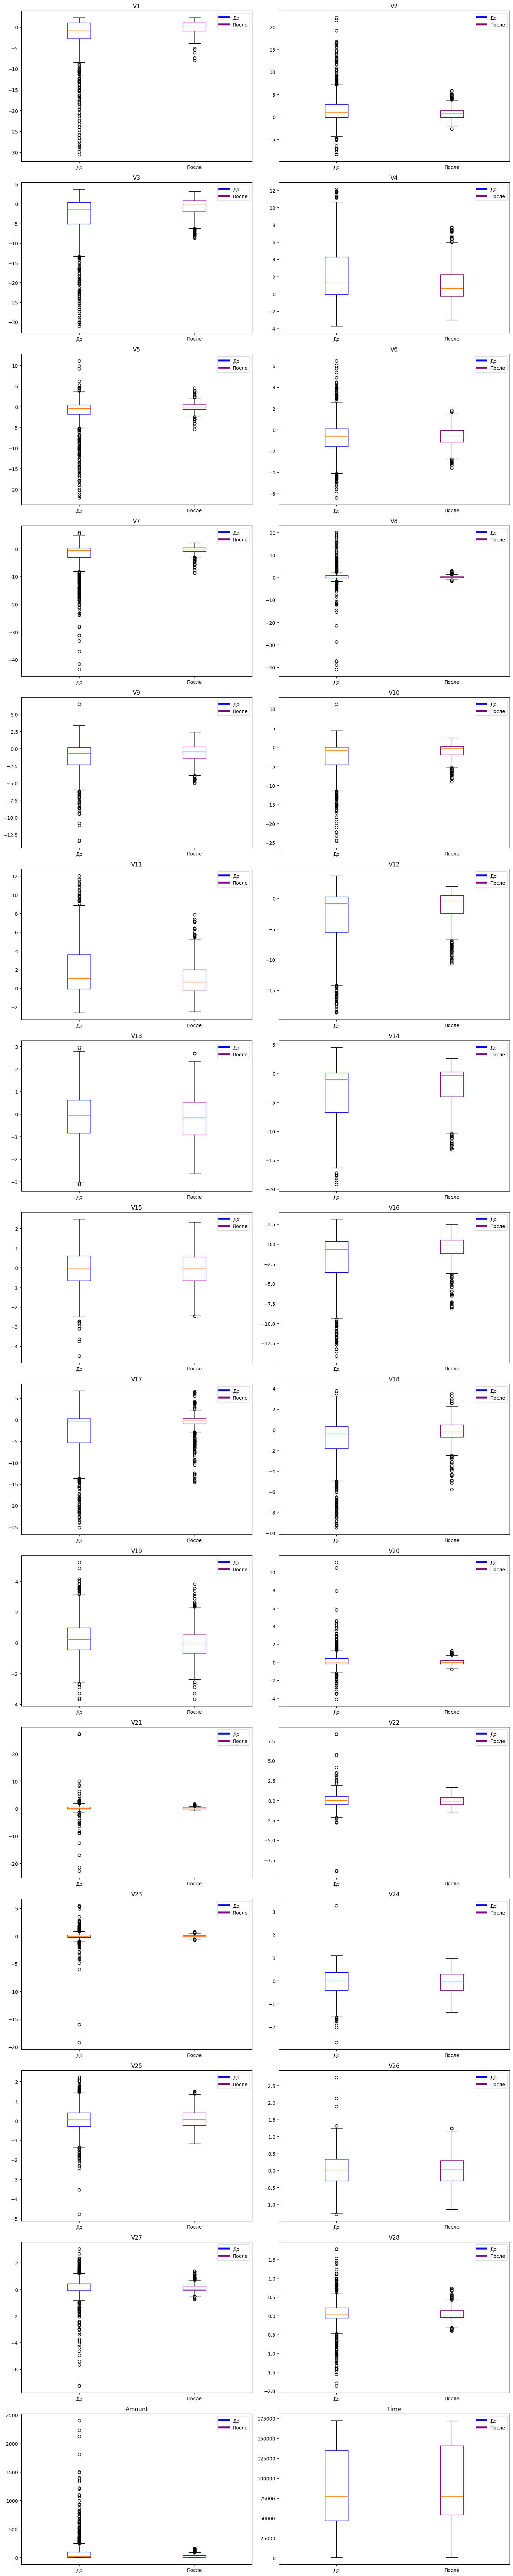

In [ ]:
num_features = len(features)

num_cols = 2
num_rows = (num_features + num_cols - 1) // num_cols

# Создайте подграфики для визуализации
f, ax = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(features):
    row = i // num_cols  #номер строки
    col = i % num_cols   #номер столбца

    #ДО
    ax[row, col].boxplot(new_df[feature], positions=[0], widths=0.2, boxprops=dict(color='blue'))

    #ПОСЛЕ
    ax[row, col].boxplot(new_df_without_outliers[feature], positions=[1], widths=0.2, boxprops=dict(color='purple'))

    ax[row, col].set_title(feature)
    ax[row, col].set_xticks([0, 1])
    ax[row, col].set_xticklabels(['До', 'После'])

    blue_box = plt.Line2D([0], [0], color='blue', lw=4, label='До')
    purple_box = plt.Line2D([0], [0], color='purple', lw=4, label='После')
    ax[row, col].legend(handles=[blue_box, purple_box])

#скрываем пустые подграфики
for i in range(num_features, num_rows * num_cols):
    ax.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


###Понижение размерности и кластеризация

In [ ]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

X = new_df.drop('Class', axis=1)
y = new_df['Class']

#некоррелирующих признаков
X.drop(['Time', 'Amount'], axis=1, inplace=True)

#T-SNE
t0 = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)
t1 = time.time()
print("T-SNE {:.2f} сек".format(t1 - t0))

#PCA
t0 = time.time()
pca = PCA(n_components=2, random_state=42)
X_reduced_pca = pca.fit_transform(X)
t1 = time.time()
print("PCA {:.2f} сек".format(t1 - t0))

#Truncated SVD
t0 = time.time()
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced_svd = svd.fit_transform(X)
t1 = time.time()
print("Truncated SVD {:.2f} сек".format(t1 - t0))


T-SNE 7.22 сек
PCA 0.01 сек
Truncated SVD 0.01 сек


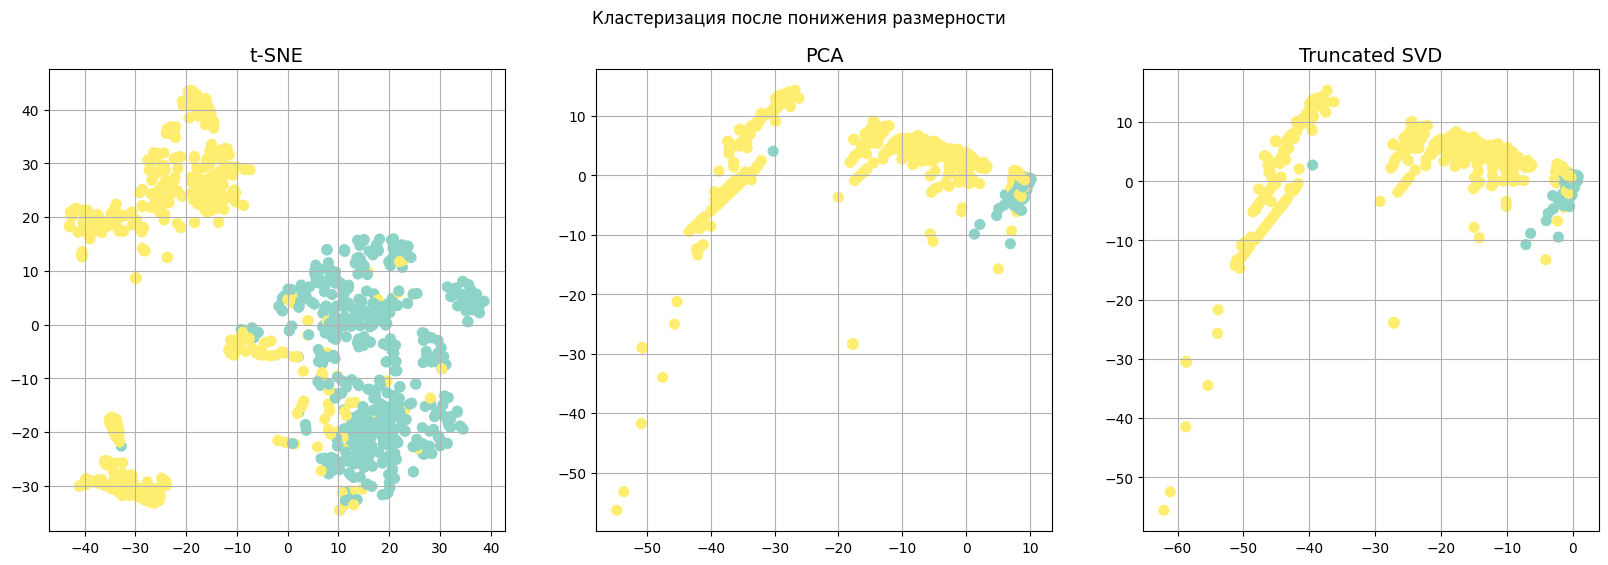

In [ ]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
f.suptitle('Кластеризация после понижения размерности', fontsize=12)

# T-SNE scatter plot
sc1 = ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap= 'Set3', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)

# PCA scatter plot
sc2 = ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=y, cmap='Set3', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)

# TruncatedSVD scatter plot
sc3 = ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=y, cmap='Set3', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)

plt.show()


Данные хорошо кластеризуются, можно проводить дальнейшее исследование.